![Clustering](https://d1m75rqqgidzqn.cloudfront.net/wp-data/2020/01/17162345/clustering-algorithms-in-Machine-Learning-696x464.jpg)

# Introduction

I have made this notebook as an guide to understand implementaiton of clustering on a dataset using different techniques available in sklearn library. We will compare and contrast three most popular clustering techniques: Partition, Hierarchical clustering and spectral clustering.

The sections in this notebook are:
1. [Introduction](https://www.kaggle.com/gireeshs/complete-guide-to-clustering-techniques/#Introduction)
2. [What is clustering?](https://www.kaggle.com/gireeshs/complete-guide-to-clustering-techniques/#What-is-clustering?)
3. [Partition clustering](https://www.kaggle.com/gireeshs/complete-guide-to-clustering-techniques/#Partition-clustering:)
4. [Implementation of k-Means using SKLearn](https://www.kaggle.com/gireeshs/complete-guide-to-clustering-techniques/#Implementation-of-k-Means-using-SKLearn)
5. [Hierarchical Clustering](https://www.kaggle.com/gireeshs/complete-guide-to-clustering-techniques/#Hierarchical-Clustering)
6. [Spectral clustering](https://www.kaggle.com/gireeshs/complete-guide-to-clustering-techniques/#Spectral-clustering:)
7. [Comparing and contrasting clustering](https://www.kaggle.com/gireeshs/complete-guide-to-clustering-techniques/#Comparing-and-contrasting-clustering:)
8. [References](https://www.kaggle.com/gireeshs/complete-guide-to-clustering-techniques/#References:)

I have also written a medium article from this notebook which is [available here](https://towardsdatascience.com/beginners-guide-to-clustering-techniques-164d6ad5dbb).

# What is clustering?
* Clustering is an unsupervized learning technique where you take the entire dataset and find the "groups of similar entities"  within the dataset. Hence there is no labels within the dataset.
* Useful for organizing very large dataset into meaningful clusters that can be useful and actions can be taken upon. For example, take entire customer base of more than 1M records and try to group into high value customers, low value customers and so on.

### What questions does clustering typically tend to answer?
* Types of pages are there on the Web?
* Types of customers are there in my market?
* Types of people are there on a Social network?
* Types of E-mails in my Inbox?
* Types of Genes the human genome has?




## From clustering to classification
* Clustering is base of all the classification problems. Initially, say we have a large ungrouped number of users in a new social media platform. We know for certain that the number of users will not be equal to the number of groups in the social media, and it will be reasonably finite.
* Even though each user can vary in fine-grain, they can be reasonably grouped into clusters.
* Each of these grouped *clusters* become *classes* when we know what group each of these users fall into.

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

np.random.seed(5)

In [ ]:
data = pd.concat([wine_quality.data.features, wine_quality.data.targets], axis =1)
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Partition clustering:
* Before start of clustering if we assume that data is going to fall into x number of clusters, and then partition the data into those many number of clusters then it is called partition clustering. **Number of clusters is known before performing clustering in partition clustering.**
* **k-Means** is one of the popular partition clustering technique, where the data is partitioned into k unique clusters

# k-Means clustering:

![GIF](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/K-means_convergence.gif/617px-K-means_convergence.gif)

* Let the data points X = {x1, x2, x3, ... xn} be N data points that needs to be clustered into K clusters.
* K falls between 1 and N, where if:
    * K = 1 then whole data is single cluster, and mean of the entire data is the cluster center we are looking for.
    * K =N, then each of the data individually represent a single cluster
    * Typically K falls between 1 and N
    
    
## Formulation as an optimization problem:
* Let M = {m1, m2, m3, ... mk} be the cluster mean of the K clusters. Each of the m is the representative of the individual clusters that we are looking for.
* The objective function is that we find such representation for each cluster, that approximate the data the best and the error of approximation is minimum.
* The objective function that we are trying to minimize is sum squared of the distance between each data point and its representative.

![image.png](attachment:image.png)

# Implementation of k-Means using SKLearn

In [ ]:
#Standardizing the data before proceeding:
standard_scalar = StandardScaler()
data_scaled = standard_scalar.fit_transform(data)
data = pd.DataFrame(data_scaled, columns=data.columns)
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,-0.937230
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,-0.937230
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,0.207999
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230


In [ ]:
from sklearn.cluster import KMeans

km = KMeans(init="random", n_clusters=5)
km.fit(data)

KMeans(init='random', n_clusters=5)

In [ ]:
km.labels_

array([4, 4, 4, ..., 3, 1, 1], dtype=int32)

In [ ]:
km.cluster_centers_

array([[ 2.04757094,  0.4458783 ,  1.02181932, -0.56368777,  1.27040611,
        -0.90311785, -1.29128072,  0.96687303, -0.08468044,  1.43784128,
         0.07856401,  0.07971857],
       [-0.4511042 , -0.38044909,  0.03176438, -0.38762059, -0.54818874,
         0.04149507, -0.04097545, -1.13970727,  0.01266736, -0.24147487,
         1.16784106,  0.94243917],
       [-0.18581265, -0.36224673,  0.29276718,  1.38566461, -0.14272457,
         0.94783562,  1.0261871 ,  0.87887219, -0.41876334, -0.24667513,
        -0.84475185, -0.23736765],
       [-0.19349013, -0.43729946,  0.04458269, -0.36189905, -0.19565152,
        -0.14668016,  0.20541298, -0.36274883, -0.13918864, -0.30154705,
        -0.23554513, -0.43115024],
       [ 0.10350938,  1.68930192, -1.24473223, -0.61698679,  0.69008498,
        -0.78584807, -1.12590516,  0.51240173,  0.94459128,  0.41405634,
        -0.25817636, -0.52821938]])

### But is 5 clusters good fit?
* As said above, we need to exactly specify how many clusters we are looking for in this case.
* The number of clusters is very difficult to guess intuitively. It can only be intuitively be guessed if we know the data well.

#### Solution to number of clusters:
We run the k-Means algorithm with different number of clusters and plot the goodness of fit by plotting the inertia parameter from sklearn, which gives **Sum of squared distances of samples to their closest cluster center.**


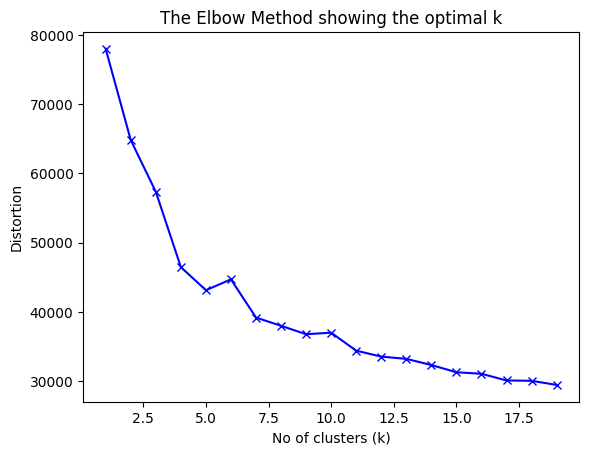

In [ ]:
# k-means determine k
distortions = []
K = range(1, 20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('No of clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Representation of cluster in 3 dimentions

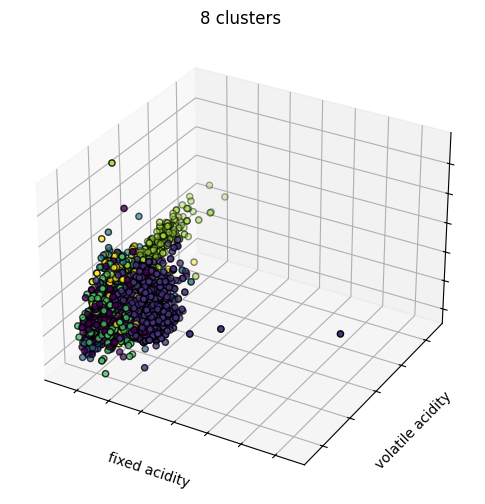

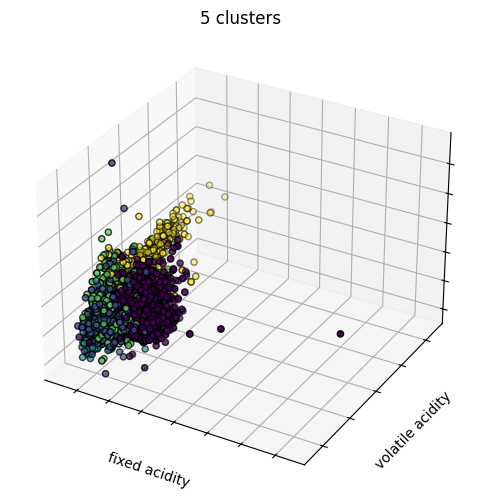

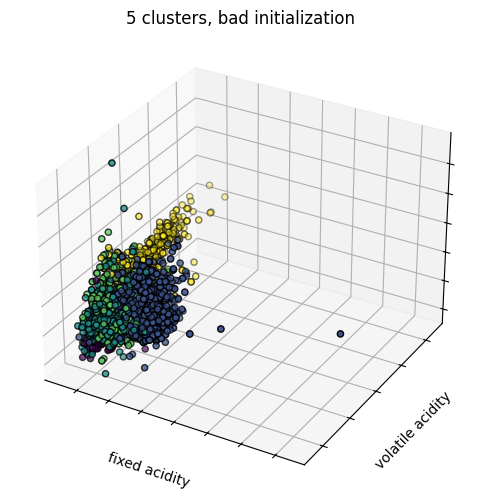

In [ ]:
estimators = [('k_means_8', KMeans(n_clusters=8, init='k-means++')),
              ('k_means_5', KMeans(n_clusters=5, init='k-means++')),
              ('k_means_bad_init', KMeans(n_clusters=5, n_init=1, init='random'))]

fignum = 1
titles = ['8 clusters', '5 clusters', '5 clusters, bad initialization']

for name, est in estimators:
    fig = plt.figure(fignum, figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    #ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(data)
    labels = est.labels_

    ax.scatter(data.values[:, 3], data.values[:, 0], data.values[:, 2], c=labels.astype(np.float64), edgecolor='k')

    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.set_xlabel('fixed acidity')
    ax.set_ylabel('volatile acidity')
    ax.set_zlabel('citric acid')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1
plt.show()

# Limitations of k-means clustering:
* k-Means clustering can only separate linear cluster boundaries, which means that it will fail to recognize far more complicated decision boundaries.

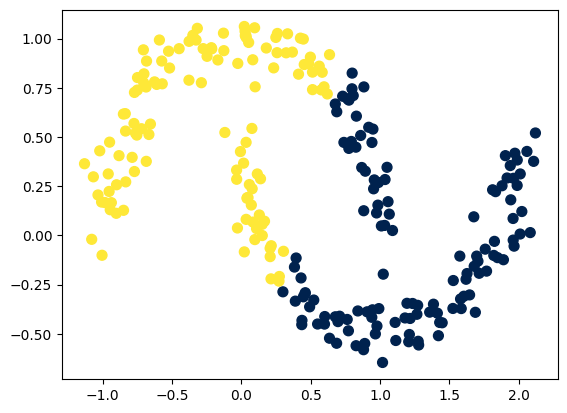

In [ ]:
from sklearn.datasets import make_moons
X3, y3 = make_moons(250, noise=.075, random_state=22)

labels = KMeans(2, random_state=0).fit_predict(X3)
plt.scatter(X3[:, 0], X3[:, 1], c=labels, s=50, cmap='cividis')

# Hierarchical Clustering
The natural world is made up of hierarchy, like in food chain, organizational structure, biological classification of species, etc,.
Bottom-up hierarchical clustering also known as **agglomerative clustering**.
![image.png](attachment:image.png)
The representation is called as a dentogram of clustering.

The key hyperparameter in the agglometarive clustering is the called **linkage**. It is the distance between two clusters in general. It is similar to the cluster mean M that is taken for the k-Means clustering. It can be represented in many ways:
1. Single linkage: The distance between two closest points between the two clusters
2. Complete linkage: Distance between two farthest points between the two clusters
3. Average linkage: It is between single and complete linkage. Average between all pair of points is taken. This is robust to noise

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(data)
clustering

AgglomerativeClustering()

In [ ]:
clustering.labels_

array([1, 1, 1, ..., 0, 0, 0])

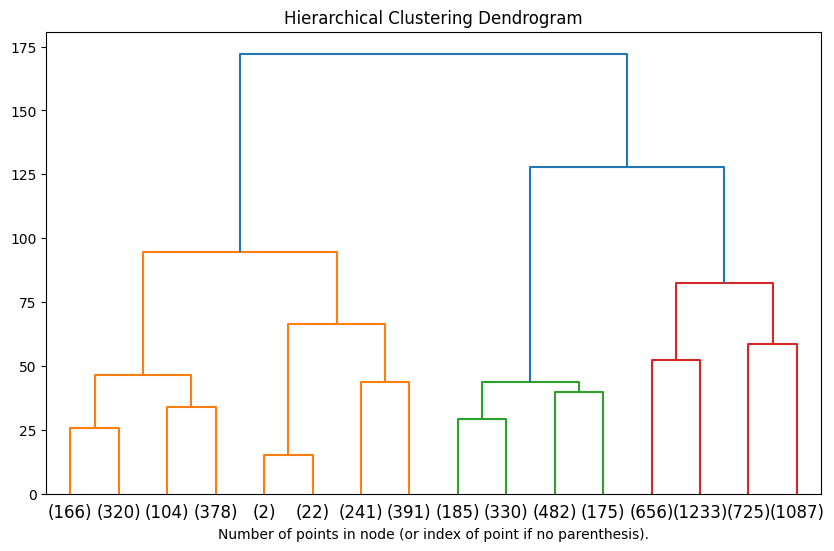

In [ ]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(data)

plt.figure(fignum, figsize=(10, 6))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


For the same moon dataset we can now see that with AgglomerativeClustering, single linkage, we can get good clusters

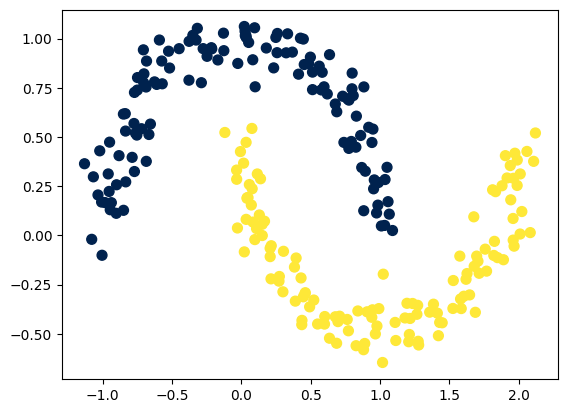

In [ ]:
from sklearn.datasets import make_moons
X3, y3 = make_moons(250, noise=.075, random_state=22)

single = AgglomerativeClustering(n_clusters=2, linkage='single')

labels = single.fit_predict(X3)
plt.scatter(X3[:, 0], X3[:, 1], c=labels, s=50, cmap='cividis')

# Spectral clustering:
* Works on similarity graphs where each node represents an entity and weight on the edge
* Consider the structure similar to a graph where all the nodes are connected to all other nodes with edges constituting of weights
* If we want to split it into two clusters, clearly we want to want to eliminate the edges which has the lowest weight

![image.png](attachment:image.png)

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans').fit(data)
model

SpectralClustering(affinity='nearest_neighbors', n_clusters=2)

In [ ]:
clustering.labels_

array([1, 1, 1, ..., 0, 0, 0])

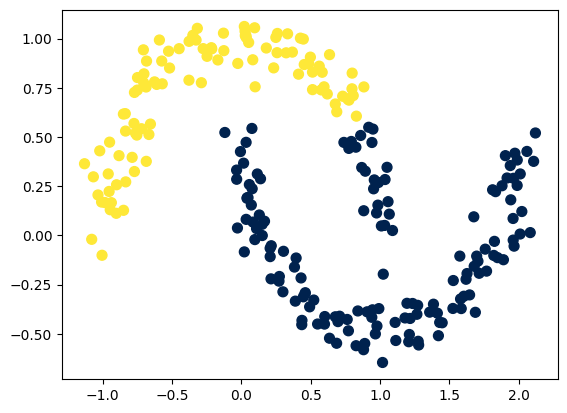

In [ ]:
from sklearn.datasets import make_moons
X3, y3 = make_moons(250, noise=.075, random_state=22)

single = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')

labels = single.fit_predict(X3)
plt.scatter(X3[:, 0], X3[:, 1], c=labels, s=50, cmap='cividis')

# Comparing and contrasting clustering:

|Partition clustering|Hierarchical clustering|Spectral clustering|
|------|------|------|
|Works on data with Euclidean feature spaces|Works on pairwise distance functions in a bottom-up fashion and recursive partitional clustering in a top-down fashion|Works on similarity graphs where each node represents an entity and weight on the edge|
|Complixity of k-Means is linear O(n)|Complixity is quardratic O(n^2)|Complixity is is linear O(n)|
|Prior knowledge of number of clusters is necessary|Number of clusters can be interpreted after clustering is done|Prior knowledge of number of clusters is necessary|

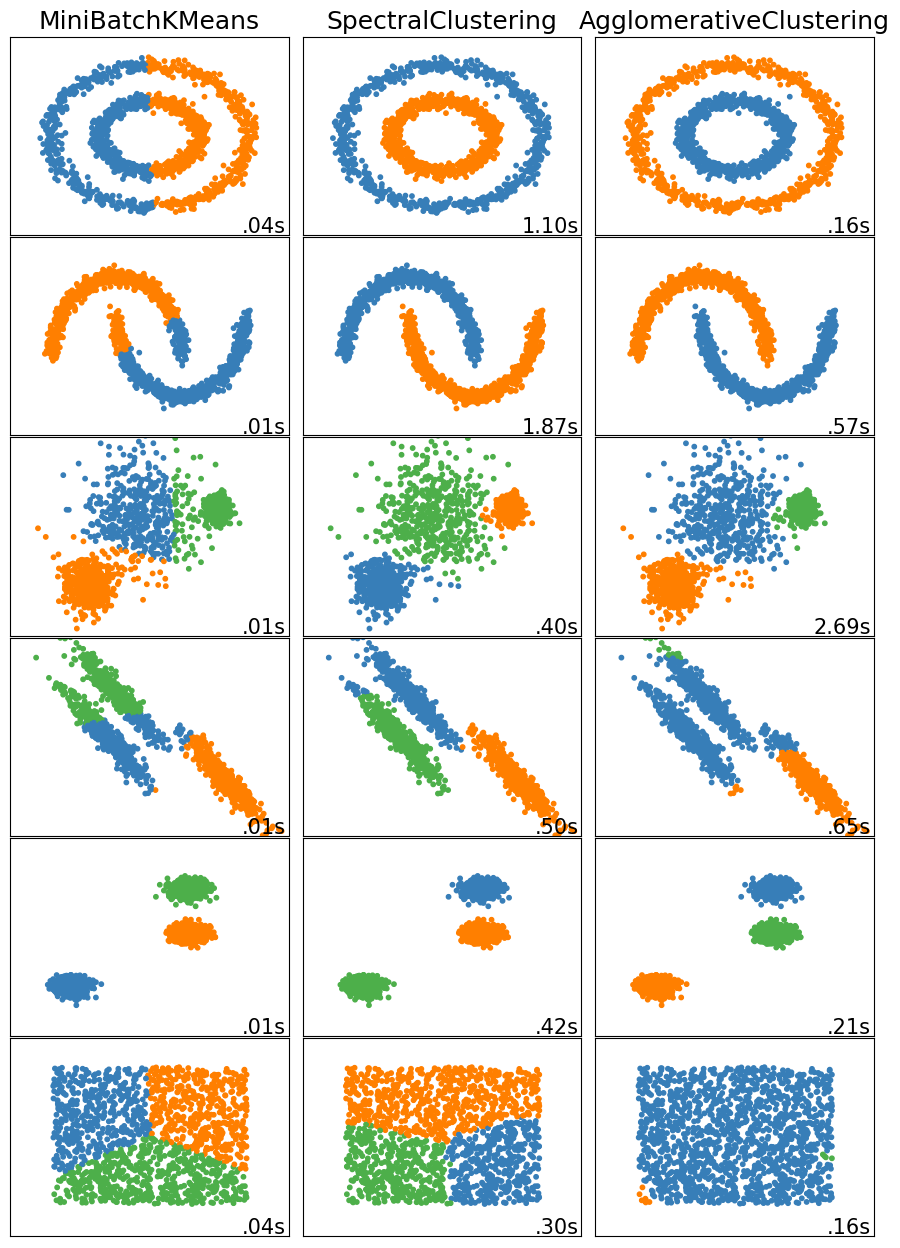

In [ ]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(3 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    optics = cluster.OPTICS(min_samples=params['min_samples'],
                            xi=params['xi'],
                            min_cluster_size=params['min_cluster_size'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", metric="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        ('SpectralClustering', spectral),
        ('AgglomerativeClustering', average_linkage),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int64)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

# References:
1. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
2. https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html#sphx-glr-auto-examples-cluster-plot-cluster-iris-py
3. https://greyatom.com/programs/learn-data-science-online-with-projects/learn
4. https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py
5. https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py

# Images taken from:
1. https://www.mygreatlearning.com/blog/clustering-algorithms-in-machine-learning/
2. https://commons.wikimedia.org/wiki/File:K-means_convergence.gif
3. https://www.solver.com/xlminer/help/hierarchical-clustering-intro
4. https://towardsdatascience.com/spectral-clustering-aba2640c0d5b